# Tweets Sentiment Analysis in Spanish

In this project I use [tweepy library](https://www.tweepy.org/) to get tweets searching them by keyword. I then use [pysentimiento library](https://github.com/pysentimiento/pysentimiento/) to preprocess them and analyze sentiment and emotion expressed in them.

In [ ]:
#Importing tweepy and Twitter credentials
import tweepy
import configparser
config = configparser.ConfigParser()
config.read("../config/keys_config.cfg")
api_key = config.get("twitter","api_key")
api_key_secret = config.get("twitter","api_key_secret")
access_token = config.get("twitter","access_token")
access_token_secret = config.get("twitter","access_token_secret")
bearer_token = config.get("twitter","bearer_token")

In [ ]:
#Creating a function that creates a pandas DataFrame with tweets we ask
import requests
import pandas as pd
import numpy as np
import json

def get_tweets(query:str, n_results=1000):
    """
    Receives a string of twitter API rule as query for search_recent_tweets endpoint. Example: "carrefour argentina -is:retweet lang:es"
    Returns a pandas dataframe with text, created_ar, author_id and tweet_id columns.
    Requires imported tweepy, requests, pandas as pd, numpy as np, json
    """
    client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)
    tweets = tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=["created_at", "author_id"], max_results=100)
    df = pd.DataFrame(data=[[tweet.created_at, tweet.author_id, tweet.text] for tweet in tweets.flatten(limit=n_results)], columns=["Created_at","Author_id","Text"])
    return df

In [49]:
import pandas as pd 
pd. set_option('display.max_colwidth', 1)
# Incert query here
query = "planes sociales lang:es -is:retweet"
df = get_tweets(query=query, n_results=20000)
df.head(10)

,Unnamed: 0,Created_at,Author_id,Text,Text_prep
0,0,2022-06-28 20:16:24+00:00,1069053968,"@fransanchez156 @rochi61975633 @Lilymir2 @cuervotinelli ¿desempleo con planes sociales incluidos? 7% ahora por ejemplo? qué ganas de creerles que tenés...\nDe todos modos, lo que yo dije no es referente a De La Rúa, sino al actual gobierno que es peor de que el de De La Rúa.\nDijiste adios, fijate si vas a seguir escribiendo boludeces.","@usuario @usuario @usuario @usuario ¿desempleo con planes sociales incluidos? 7% ahora por ejemplo? qué ganas de creerles que tenés...\nDe todos modos, lo que yo dije no es referente a De La Rúa, sino al actual gobierno que es peor de que el de De La Rúa.\nDijiste adios, fijate si vas a seguir escribiendo boludeces."
1,1,2022-06-28 20:11:13+00:00,1060318614589530113,"@camboue Ustedes que hablaban de los planes sociales y bla bla bla y dibujan los números con los laburos esos x 2 mangos que dan las intendencias para salir a boconear.\nLos únicos que se llenan de guita son ustedes, dejá de hablar de los laburantes, vos no representas a los laburantes","@usuario Ustedes que hablaban de los planes sociales y bla bla bla y dibujan los números con los laburos esos x 2 mangos que dan las intendencias para salir a boconear.\nLos únicos que se llenan de guita son ustedes, dejá de hablar de los laburantes, vos no representas a los laburantes"
2,2,2022-06-28 20:09:23+00:00,1498335195048652806,Klug reivindicó los planes sociales y celebró el debate del Salario Básico Universal https://t.co/BqcS2ibswb | @LuciaKlug @JuanGrabois @FrenteTodos_PBA @HCDiputadosBA @BAProvincia @CFKArgentina https://t.co/tHIyedbrrb,Klug reivindicó los planes sociales y celebró el debate del Salario Básico Universal url | @usuario @usuario @usuario @usuario @usuario @usuario url
3,3,2022-06-28 20:08:29+00:00,1509653648673968129,16:46-Planes sociales: Massa y Monzó proponen su conversión a empleo y que participen gobernadores e intendentes #Planes #sociales #Massa #Monzó #proponen #conversión #empleo #participen #gobernadores #intendentes https://t.co/EbU8eZqYM3,16:46-Planes sociales: Massa y Monzó proponen su conversión a empleo y que participen gobernadores e intendentes planes sociales massa monzó proponen conversión empleo participen gobernadores intendentes url
4,4,2022-06-28 20:08:15+00:00,1488261348144340998,"@marioraulnegri CHARLATANES...los planes sociales hay que mantenerlos, donde vas a conseguir un empleado por 10 $ y que te agradesca, un maestro por la 3°parte de lo que dice el convenio los gremios mudos y todos felices\nEl mismo sistema sin ROBAR\nFIRME SEÑOR PRESIDENTE\nM. MACRI\nSI SE PUEDE","@usuario CHARLATANES...los planes sociales hay que mantenerlos, donde vas a conseguir un empleado por 10 $ y que te agradesca, un maestro por la 3parte de lo que dice el convenio los gremios mudos y todos felices\nEl mismo sistema sin ROBAR\nFIRME SEÑOR PRESIDENTE\nM. MACRI\nSI SE PUEDE"
5,5,2022-06-28 20:02:57+00:00,709818306,Diputados de la oposición le reclamaron al Gobierno información sobre la distribución de los planes sociales https://t.co/LXC69zmr56,Diputados de la oposición le reclamaron al Gobierno información sobre la distribución de los planes sociales url
6,6,2022-06-28 19:58:26+00:00,61556916,"@CarlosZelayaR Libertad? De quién de ustedes y su familia porque sus políticas mediocres no crean personas libres sino esclavos de planes sociales, inflación y sin libertad de expresión","@usuario Libertad? De quién de ustedes y su familia porque sus políticas mediocres no crean personas libres sino esclavos de planes sociales, inflación y sin libertad de expresión"
7,7,2022-06-28 19:58:02+00:00,1031336857643180032,"Cuando te de un poquito de lastima lo que le pase a Duhalde, acordate que por culpa de él apareció el monigote fallecido el día del censo y la del koleston rojizo. Si no era por él, hoy (de minima) tendríamos los mismos pobres y planes sociales que en 2002 y no tendríamos récord.","Cuando te de un poquito de lastima lo que l

In [ ]:
# Preprocess tweets
# !pip install pysentimiento
from pysentimiento.preprocessing import preprocess_tweet
df["Text_prep"] = df["Text"].apply(preprocess_tweet)

In [50]:
#Instantiate a sentiment analyzer
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")
df["sentiment"] = df["Text"].apply(analyzer.predict)
df["sent_label"] = df["sentiment"].apply(lambda x: x.output)
df[["sentiment","sent_label"]].head()

Text(0.5, 1.0, 'Sentimiento en tweets planes sociales')

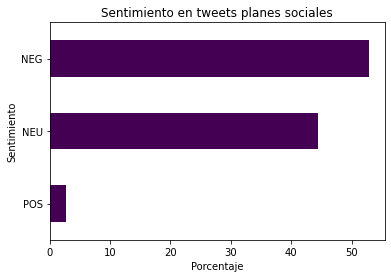

In [67]:
import matplotlib.pyplot as plt
df_sent = df["sent_label"].value_counts(normalize=True).sort_values()*100
ax = df_sent.plot(kind="barh", colormap="viridis")
ax.set_xlabel("Porcentaje")
ax.set_ylabel("Sentimiento")
ax.set_title("Sentimiento en tweets planes sociales")

In [68]:
df_sent

POS    2.76 
NEU    44.42
NEG    52.82
Name: label, dtype: float64

In [55]:
#Instantiate an emotion analyzer
em_analyzer = create_analyzer(task="emotion", lang="es")
df["emotion"] = df["Text_prep"].apply(em_analyzer.predict)
df["em_label"] = df["emotion"].apply(lambda x: x.output)

loading file https://huggingface.co/pysentimiento/robertuito-emotion-analysis/resolve/main/tokenizer.json from cache at C:\Users\Daria Kholodova/.cache\huggingface\transformers\493237802ea94d02bfc7907883a3298b35a6cbd8d813fd11630c8c5056826a45.0843b07596b388e054bae078721182b4846b9e28a7bbf04d7079b274f8613ae3
loading file https://huggingface.co/pysentimiento/robertuito-emotion-analysis/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/pysentimiento/robertuito-emotion-analysis/resolve/main/special_tokens_map.json from cache at C:\Users\Daria Kholodova/.cache\huggingface\transformers\d36fe9b59af3e679efca2cfa00cffbc44be132ebc5ef39a61d32f5e60ee37ba2.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/pysentimiento/robertuito-emotion-analysis/resolve/main/tokenizer_config.json from cache at C:\Users\Daria Kholodova/.cache\huggingface\transformers\e5b58eb4110c09192df285dc3f632cae9b9474d810bb489a651effa5ddb2e2e9.

Text(0.5, 1.0, 'Emociones en los tweets planes sociales')

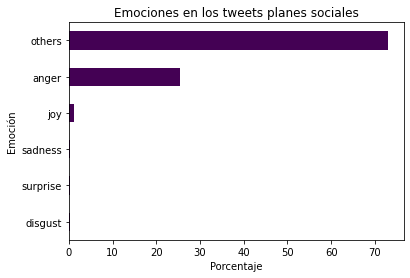

In [66]:
df_emotion = df["emocion_label"].value_counts(normalize=True).sort_values()*100
ax = df_emotion.plot(kind="barh", colormap='viridis')
ax.set_xlabel("Porcentaje")
ax.set_ylabel("Emoción")
ax.set_title("Emociones en los tweets planes sociales")

In [69]:
df_emotion

disgust     0.16 
surprise    0.16 
sadness     0.28 
joy         1.14 
anger       25.30
others      72.96
Name: emocion_label, dtype: float64